In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
#Read in dataset
df = pd.read_csv('D:\Spring 18\ML\Project\CleanedInterviews - FINAL.csv')
print(len(df)) #total number of rows

1233


In [9]:
#Using label encoder to label variables
label = LabelEncoder()

#example for converting a list
#sample_list = ['a','b','b','a','c','a','d']
#new_list = label.fit_transform(sample_list)
#print(new_list)

In [10]:
#selecting the subset of our dataset to be features in DT. 
cols = df.columns
print(cols)
print(type(cols))

#Choosing specific columns. Starting with the easy ones first
chosenFeatures = ['Client name', 'Industry', 'Location', 'position',
        'Interview Type', 'Gender', 'necessary_permission',
       'unscheduled_meetings', 'followup_3hours_call', 'alternative_number',
       'resume_printout_JD', 'venue_details', 'shared_call_letter',
       'Expected Attendance', 'Marital Status']

Index(['Date of Interview', 'Client name', 'Industry', 'Location', 'position',
       'skillset', 'Interview Type', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location', 'necessary_permission',
       'unscheduled_meetings', 'followup_3hours_call', 'alternative_number',
       'resume_printout_JD', 'venue_details', 'shared_call_letter',
       'Expected Attendance', 'Observed Attendance', 'Marital Status'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [11]:
#need to convert to list, because we can converst list to integers
#cols = chosenColumns.tolist()
#initializing new empty Pandas DataFrame
indepVars = pd.DataFrame()

#Interating over our list to append columns to new DataFrame
for column in chosenFeatures:
    #print(column)
    #doing a transformation for each column in cols to convert from type 'object' to 'string'
    indepVars[column] = label.fit_transform(df[column].astype('str'))
    
print(indepVars.head(5))

   Client name  Industry  Location  position  Interview Type  Gender  \
0            7         5         2         0               1       1   
1            7         5         2         0               1       1   
2            7         5         2         0               1       1   
3            7         5         2         0               1       1   
4            7         5         2         0               1       1   

   necessary_permission  unscheduled_meetings  followup_3hours_call  \
0                     1                     1                     1   
1                     1                     1                     1   
2                     2                     0                     2   
3                     1                     1                     0   
4                     1                     1                     1   

   alternative_number  resume_printout_JD  venue_details  shared_call_letter  \
0                   1                   1              1    

In [12]:
#First creating dependent and independent variables as own objects
depVar = pd.DataFrame()
for column in ['Observed Attendance']:
    #print(column)
    #doing a transformation for each column in cols to convert from type 'object' to 'string'
    depVar[column] = label.fit_transform(df[column].astype('str'))
Y = depVar
X = indepVars
print(X.head(5))
print(Y.head(5))

   Client name  Industry  Location  position  Interview Type  Gender  \
0            7         5         2         0               1       1   
1            7         5         2         0               1       1   
2            7         5         2         0               1       1   
3            7         5         2         0               1       1   
4            7         5         2         0               1       1   

   necessary_permission  unscheduled_meetings  followup_3hours_call  \
0                     1                     1                     1   
1                     1                     1                     1   
2                     2                     0                     2   
3                     1                     1                     0   
4                     1                     1                     1   

   alternative_number  resume_printout_JD  venue_details  shared_call_letter  \
0                   1                   1              1    

In [13]:
#Seeing if each column has the expected number of levels (to account for NAs)
for col in chosenFeatures:
    print(indepVars[col].value_counts())

10    904
8      75
7      75
1      28
5      23
0      22
6      20
12     18
11     17
9      17
3      15
13     11
4       5
2       2
14      1
Name: Client name, dtype: int64
0    949
5    165
3     45
4     23
1     23
6     17
2     11
Name: Industry, dtype: int64
2    844
1    292
5     38
4     34
6     15
0      9
3      1
Name: Location, dtype: int64
1    1023
0     210
Name: position, dtype: int64
1    646
0    371
2    216
Name: Interview Type, dtype: int64
1    965
0    268
Name: Gender, dtype: int64
1    921
2    204
0    108
Name: necessary_permission, dtype: int64
1    954
2    247
0     32
Name: unscheduled_meetings, dtype: int64
1    955
2    247
0     31
Name: followup_3hours_call, dtype: int64
1    937
2    247
0     49
Name: alternative_number, dtype: int64
1    942
2    248
0     43
Name: resume_printout_JD, dtype: int64
1    948
2    248
0     37
Name: venue_details, dtype: int64
1    934
2    245
0     54
Name: shared_call_letter, dtype: int64
1    885
0    3

In [15]:
#now comparing to value_counts of original columns
for col in chosenFeatures:
    print(df[col].value_counts())

Standard Chartered Bank            904
Hospira                             75
Pfizer                              75
Aon Hewitt                          28
Flextronics                         23
ANZ                                 22
Hewitt                              20
UST                                 18
Prodapt                             17
Standard Chartered Bank Chennai     17
Astrazeneca                         15
Williams Lea                        11
Barclays                             5
Aon hewitt Gurgaon                   2
Woori Bank                           1
Name: Client name, dtype: int64
BFSI                        949
Pharmaceuticals             165
IT Products and Services     45
Electronics                  23
IT Services                  23
Telecom                      17
IT                           11
Name: Industry, dtype: int64
Chennai       844
Bangalore     292
Hyderabad      38
Gurgaon        34
Noida          15
- Cochin-       9
Delhi           1
Name

In [16]:
#Dropping NAs from original df and rerunning the labelEncoding
noMissing = df.dropna()
print(len(noMissing))

984


In [17]:
indepVars = pd.DataFrame()

#Interating over our list to append columns to new DataFrame
for column in chosenFeatures:
    #print(column)
    #doing a transformation for each column in cols to convert from type 'object' to 'string'
    indepVars[column] = label.fit_transform(noMissing[column].astype('str'))
    

depVar = pd.DataFrame()
for column in ['Observed Attendance']:
    #print(column)
    #doing a transformation for each column in cols to convert from type 'object' to 'string'
    depVar[column] = label.fit_transform(noMissing[column].astype('str'))
Y = depVar
X = indepVars

In [18]:
##Splitting the data into training and testing sets##
#print(len(train_test_split(X,Y,))) #will take data and sample proportion as 33% as test and 66% training
#returns 4 because of 4 parts: split X and Y into 2 each

X_train, X_test,Y_train,Y_test = train_test_split(X,Y)

In [27]:
##Building the Decision Tree##
from sklearn.metrics import accuracy_score

#ensure we get consistent results across runs
np.random.seed(4242)


decision_clf = DecisionTreeClassifier(max_depth=5)
decision_clf = decision_clf.fit(X_train, Y_train)

#Give data to classifier so it can generate model. Test with our test data

decision_predict = decision_clf.predict(X_test)

print(accuracy_score(Y_test,decision_predict))



0.735772357724


In [28]:
#10-fold cross validation
decision_clf2 = DecisionTreeClassifier(max_depth = 5) #will different values for 'max_depth = ' as arg in DecisionTreeClassifier
decision_clf2 = decision_clf2.fit(X_train, Y_train)

cross_val_score(decision_clf2,X_train,Y_train,cv=10)

array([ 0.70666667,  0.78666667,  0.75675676,  0.74324324,  0.74324324,
        0.67567568,  0.80821918,  0.76712329,  0.7260274 ,  0.68493151])

In [29]:
##Trying to visualize the tree and failing from here down##
import os
import subprocess

In [30]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [31]:
visualize_tree(decision_clf, chosenFeatures) #I only get the text pseudo-code in a dot file in my directory

In [32]:
print(os.path)

<module 'ntpath' from 'C:\\Users\\Harshal\\Anaconda3\\lib\\ntpath.py'>


In [33]:
from graphviz import Digraph


In [34]:
from sklearn.tree import export_graphviz

In [35]:
import graphviz

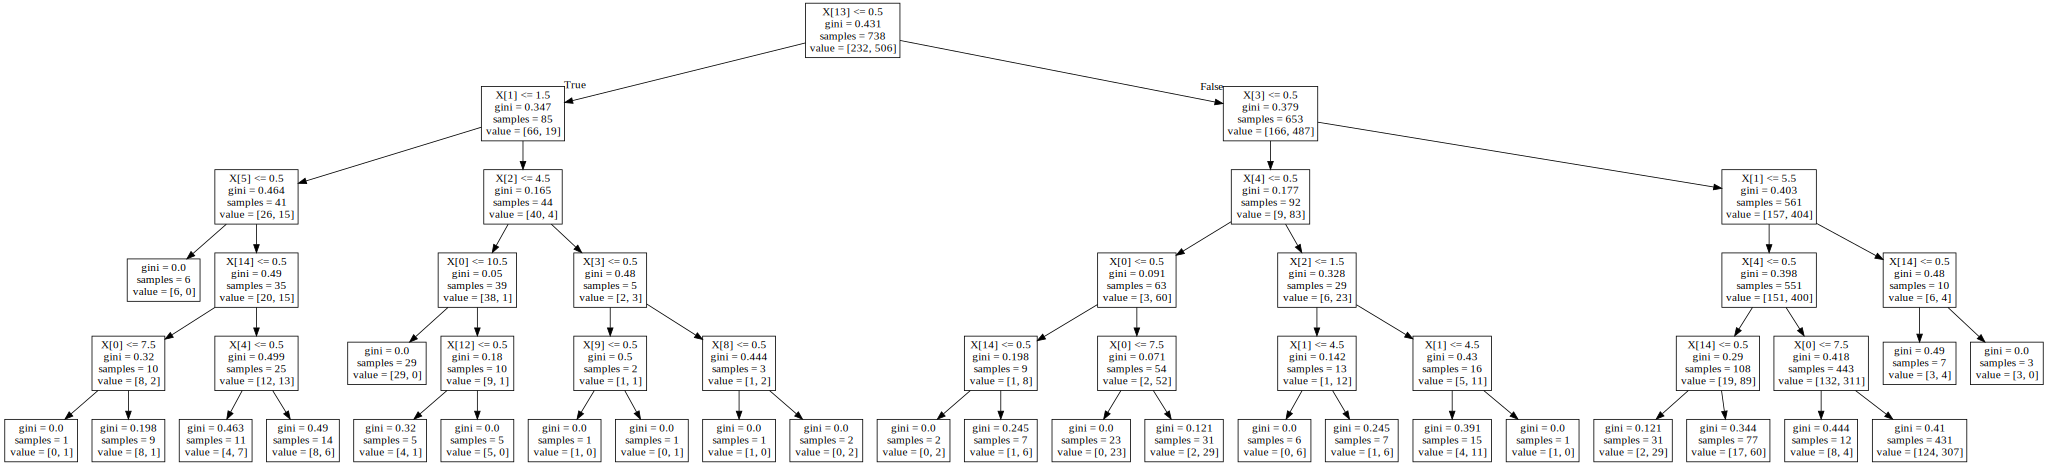

In [36]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(decision_clf, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [41]:
from sklearn import tree
dotfile = open("D:/dtreeFINAL.dot", 'w')
dot_data = tree.export_graphviz(decision_clf, out_file=dotfile, feature_names=list(chosenFeatures), class_names=["Absent", "Non-Absent"])
graph = graphviz.Source(dot_data)  
graph
dotfile.close()